# Import libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder   
from sklearn.preprocessing import OneHotEncoder 

from scipy import stats
from scipy.special import factorial

from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

import warnings

# Load Dataset

In [76]:
emig = pd.read_csv("/Users/ashish/Desktop/CCT/ass/PEA17.20231101T111117.csv")

In [77]:
emig.head()

,STATISTIC Label,Year,Sex,Nationality,UNIT,VALUE
0,Estimated Immigration (Persons in April),1996,Both sexes,Irish,Thousand,17.7
1,Estimated Immigration (Persons in April),1996,Both sexes,UK (1),Thousand,8.3
2,Estimated Immigration (Persons in April),1996,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,5.0
3,Estimated Immigration (Persons in April),1996,Both sexes,EU15 to EU27 (accession countries joined post ...,Thousand,NaN
4,Estimated Immigration (Persons in April),1996,Both sexes,Other nationalities(17),Thousand,8.2


# EDA (Exploratory Data Analysis)

In [78]:
#Dimensions of dataset
emig.shape

(486, 6)

In [79]:
##Describe the stastical value of dataset
emig.describe()

,Year,VALUE
count,486.000000,459.000000
mean,2009.000000,17.263399
std,7.796907,20.004094
min,1996.000000,1.100000
25%,2002.000000,5.000000
50%,2009.000000,9.700000
75%,2016.000000,21.800000
max,2022.000000,151.100000


In [80]:
emig.describe(include=object)

,STATISTIC Label,Sex,Nationality,UNIT
count,486,486,486,486
unique,1,3,6,1
top,Estimated Immigration (Persons in April),Both sexes,Irish,Thousand
freq,486,162,81,486


In [81]:
emig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  486 non-null    object 
 1   Year             486 non-null    int64  
 2   Sex              486 non-null    object 
 3   Nationality      486 non-null    object 
 4   UNIT             486 non-null    object 
 5   VALUE            459 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 22.9+ KB


In [82]:
##Drop column
emig= emig.drop(["UNIT","STATISTIC Label"],axis=1)

In [83]:
##Rename columns
emig= emig.rename(columns={"VALUE":"Migrantes(x1000)"})

In [84]:
emig.head()

,Year,Sex,Nationality,Migrantes(x1000)
0,1996,Both sexes,Irish,17.7
1,1996,Both sexes,UK (1),8.3
2,1996,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,5.0
3,1996,Both sexes,EU15 to EU27 (accession countries joined post ...,NaN
4,1996,Both sexes,Other nationalities(17),8.2


In [85]:
emig.dtypes

Year                  int64
Sex                  object
Nationality          object
Migrantes(x1000)    float64
dtype: object

In [86]:
##check for duplicate rows
duplicate_rows_emig = emig[emig.duplicated()]
print('number of duplicate rows', duplicate_rows_emig.shape)

number of duplicate rows (0, 4)


In [87]:
##check null value in dataset
print(emig.isnull().sum())

Year                 0
Sex                  0
Nationality          0
Migrantes(x1000)    27
dtype: int64


In [88]:
emig["Nationality"].unique()

array(['Irish', 'UK (1)',
       'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)',
       'EU15 to EU27 (accession countries joined post 2004)',
       'Other nationalities(17)', 'All nationalities'], dtype=object)

# Boxplot to check outliers in dataset

<Axes: xlabel='Migrantes(x1000)'>

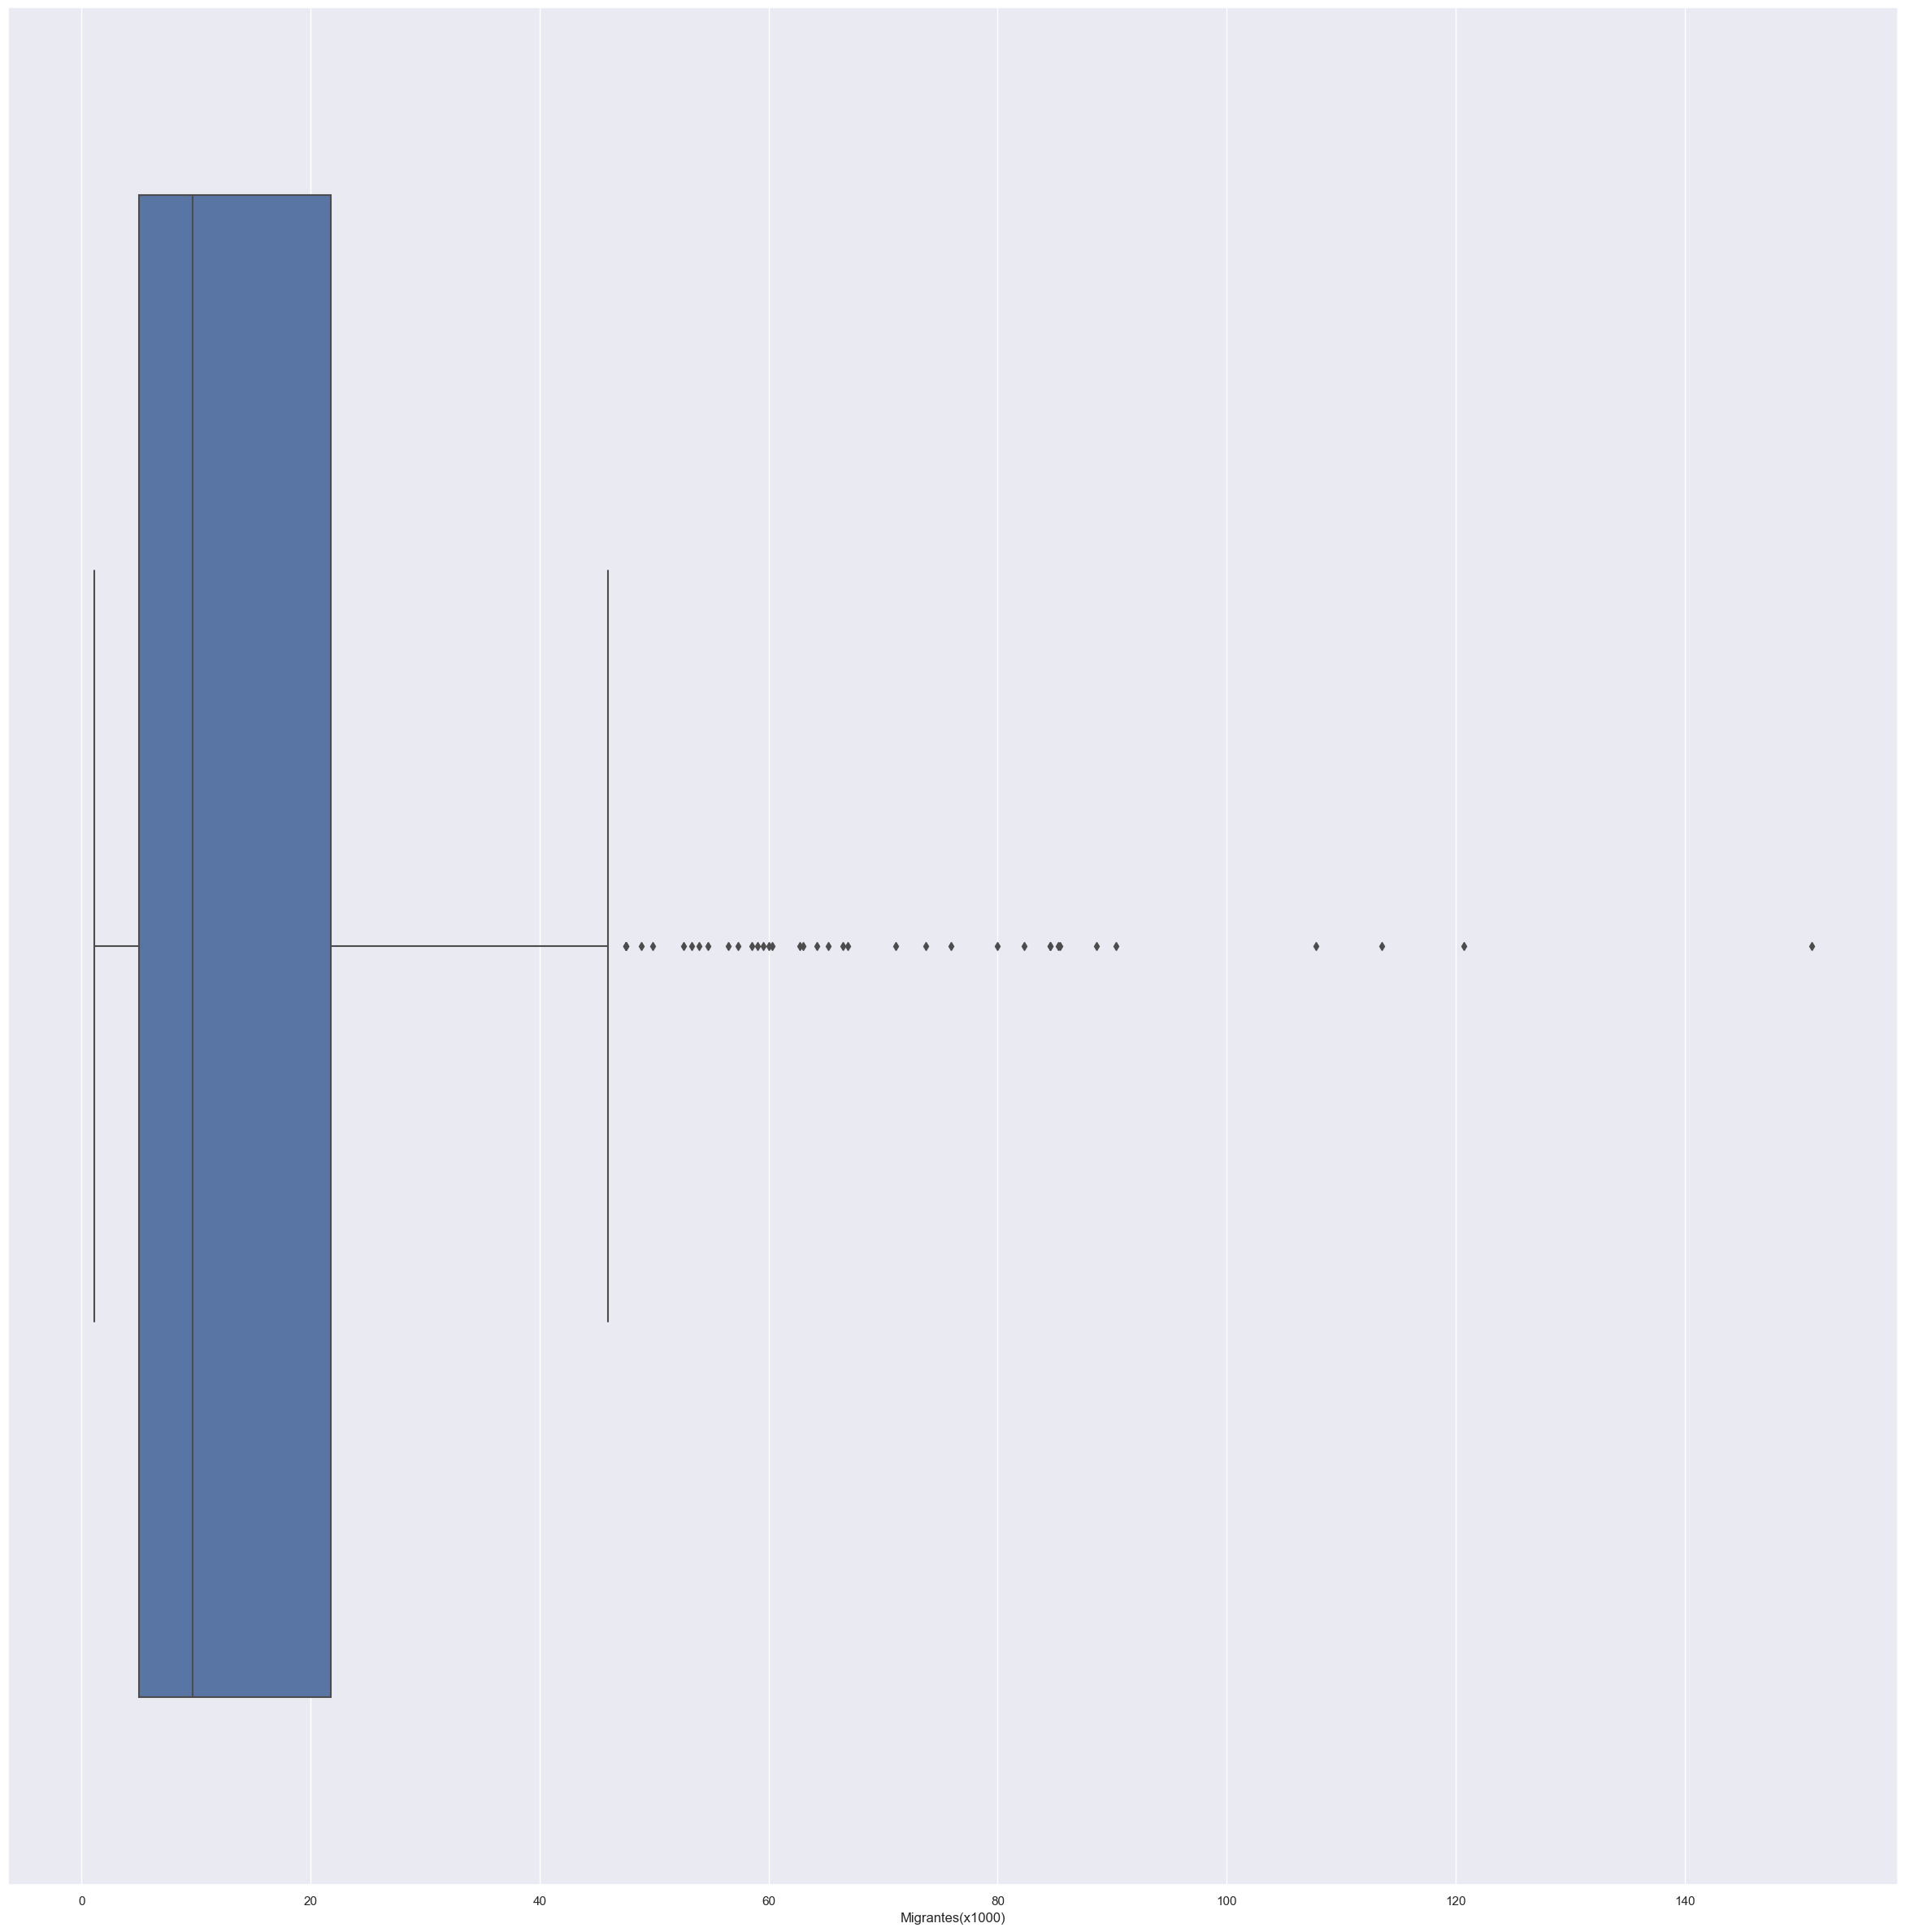

In [89]:
sns.boxplot(x=emig["Migrantes(x1000)"])

##Hisplot to see distribution of data

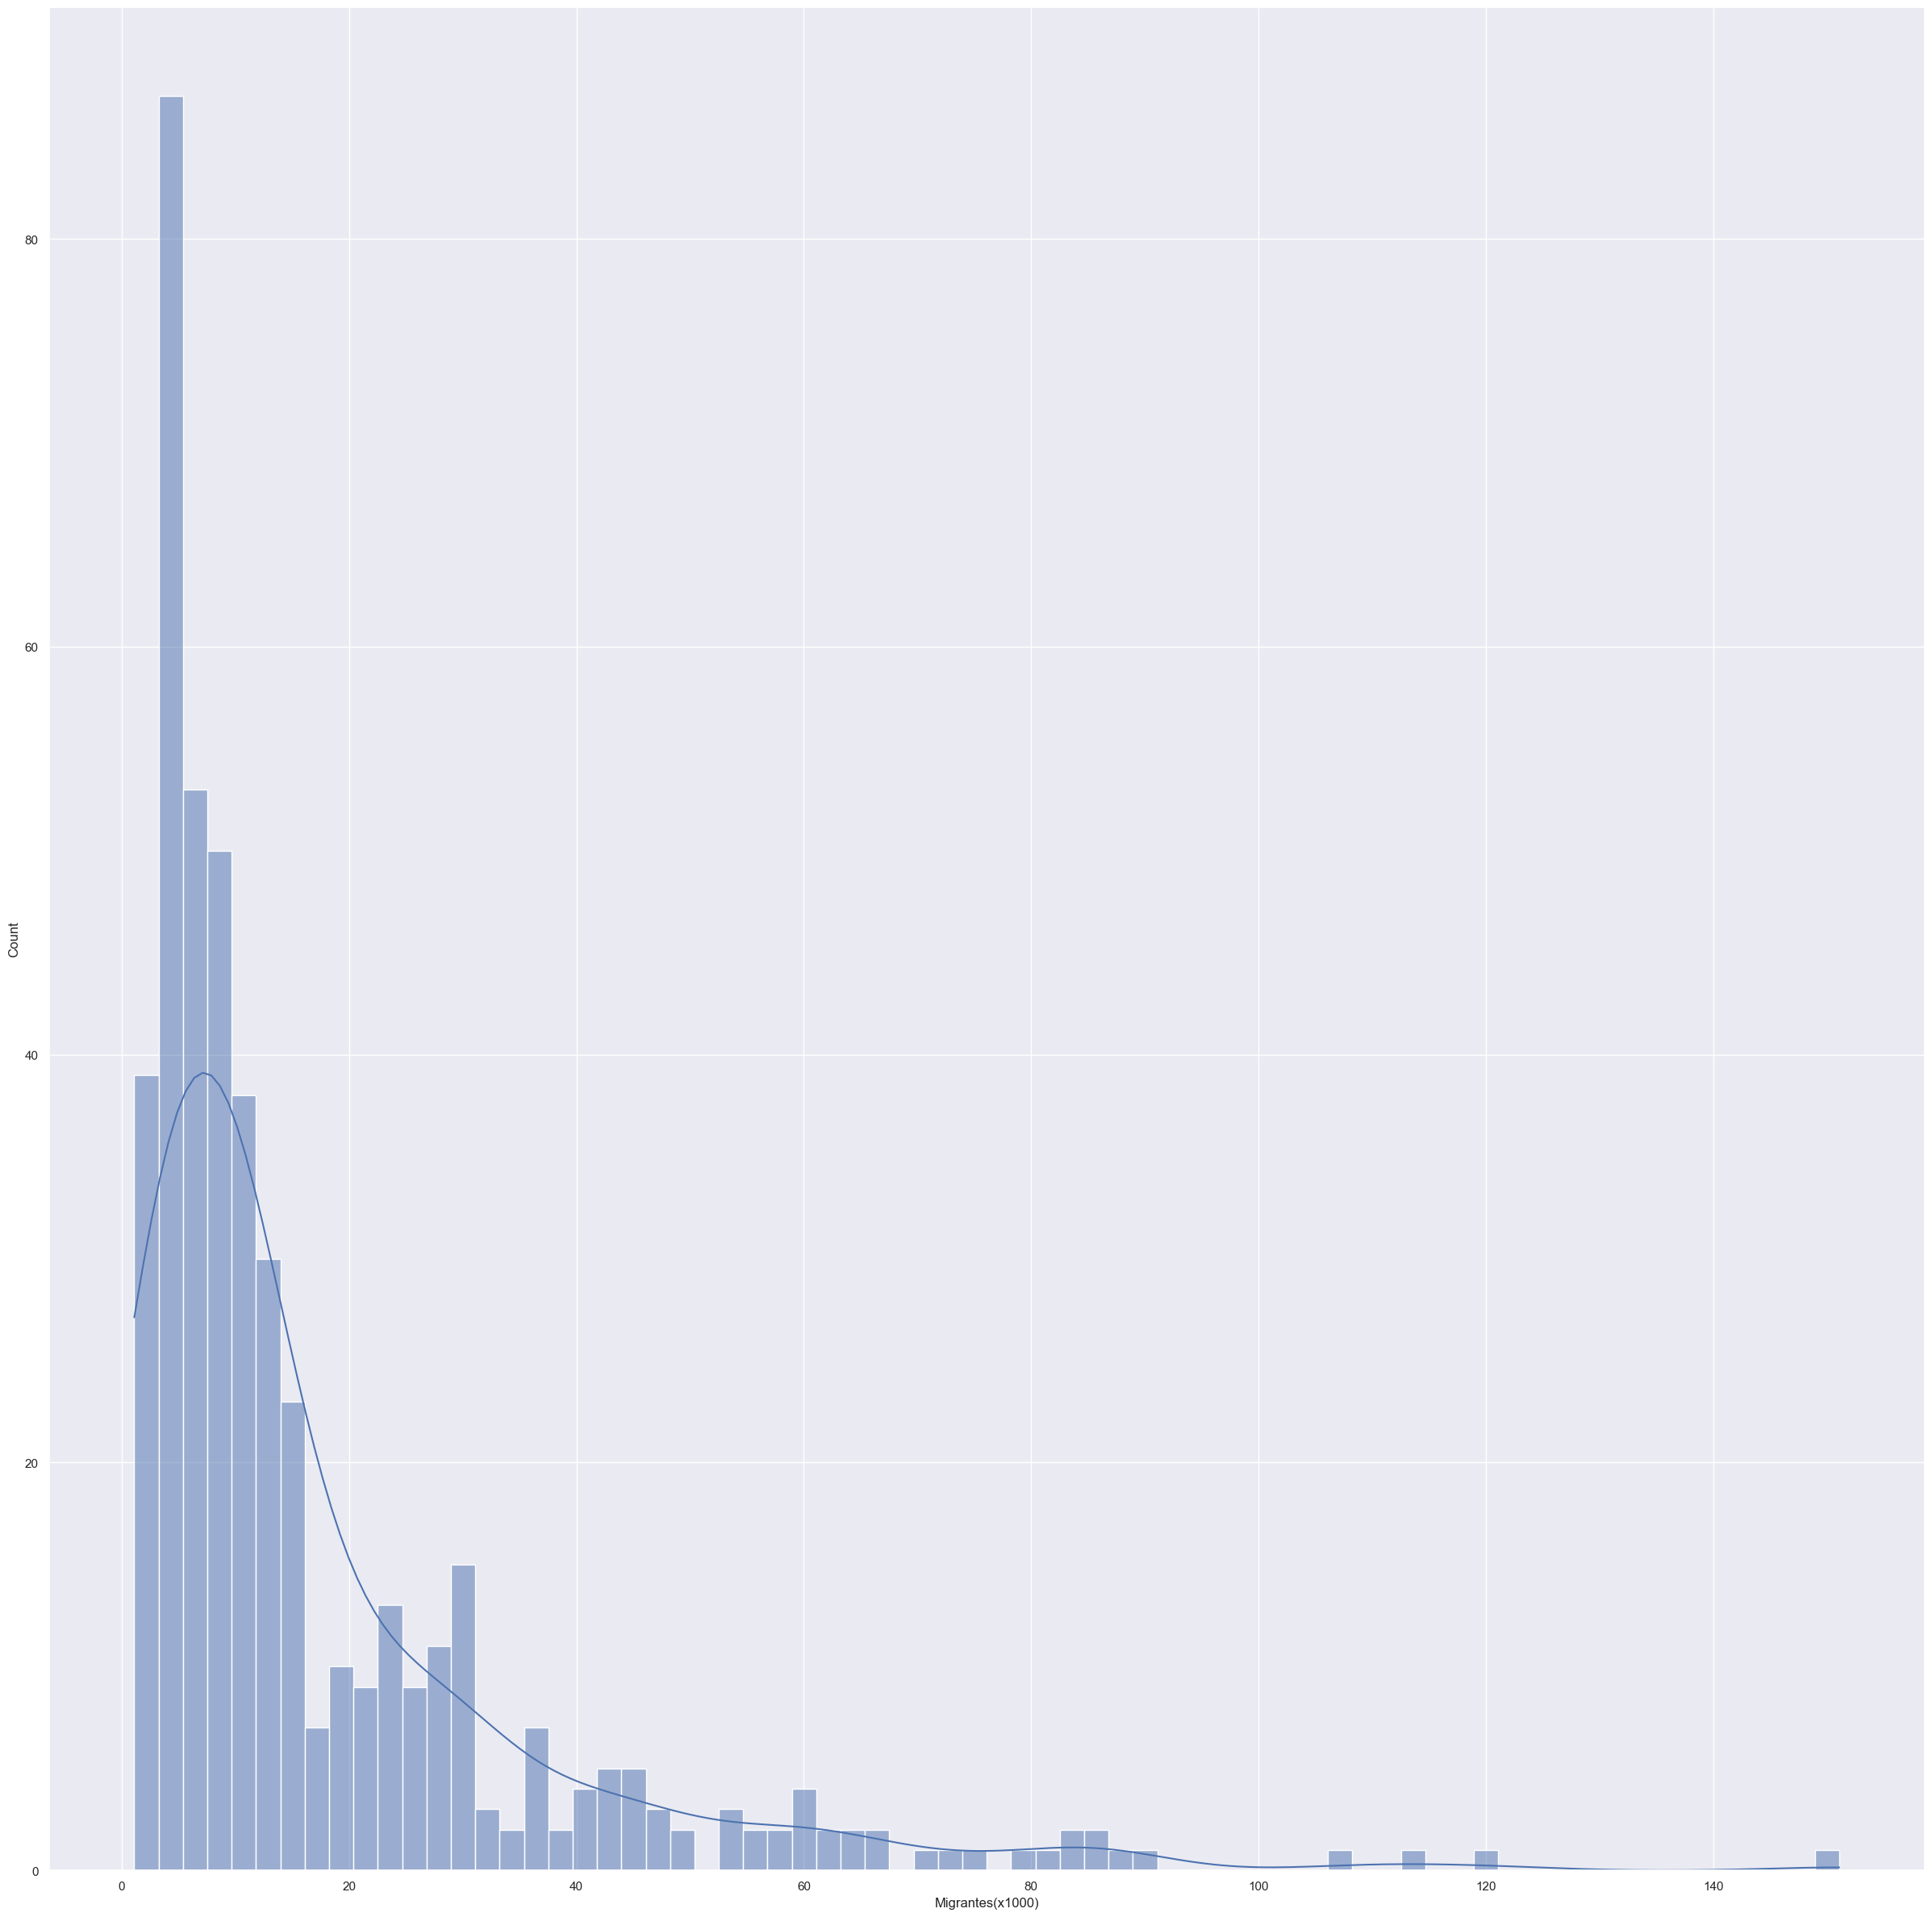

In [90]:
sns.histplot(data=emig, x='Migrantes(x1000)', kde=True, bins=70);

In [91]:
emig_skew_value = stats.skew(emig['Migrantes(x1000)'], axis=0, bias=True)
print('Skew Value',emig_skew_value)

Skew Value nan


In [92]:
kurtosis_value = stats.kurtosis(emig['Migrantes(x1000)'], axis=0, bias=True)
print('kurtosis Value',kurtosis_value)

kurtosis Value nan


#### Pairplot to see data from different perspectives

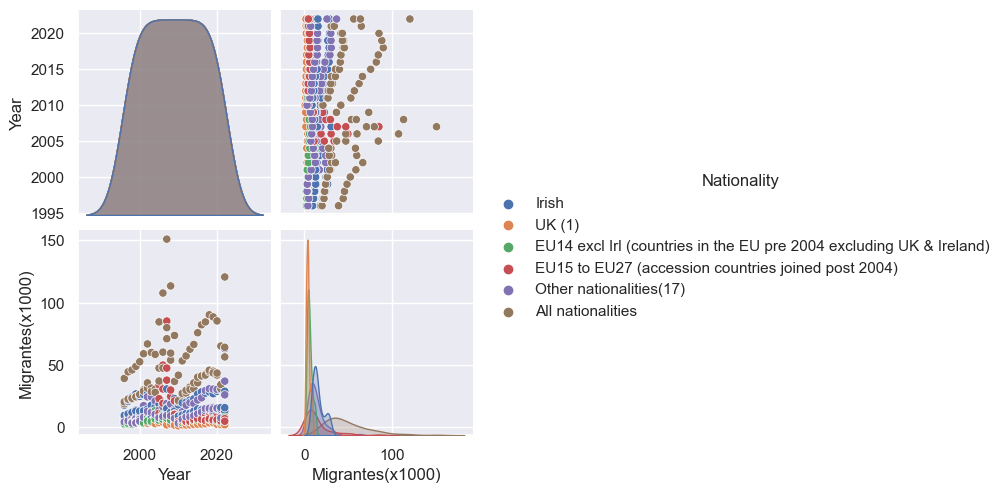

In [93]:
sns.pairplot(emig, hue="Nationality");

In [94]:
emig=emig.dropna()

In [95]:
emig.count()

Year                459
Sex                 459
Nationality         459
Migrantes(x1000)    459
dtype: int64

In [96]:
def plot_boxplot(data_frame, col_name):
    plt.figure(figsize=(10,8))
    sns.boxplot(data = data_frame, x=col_name);

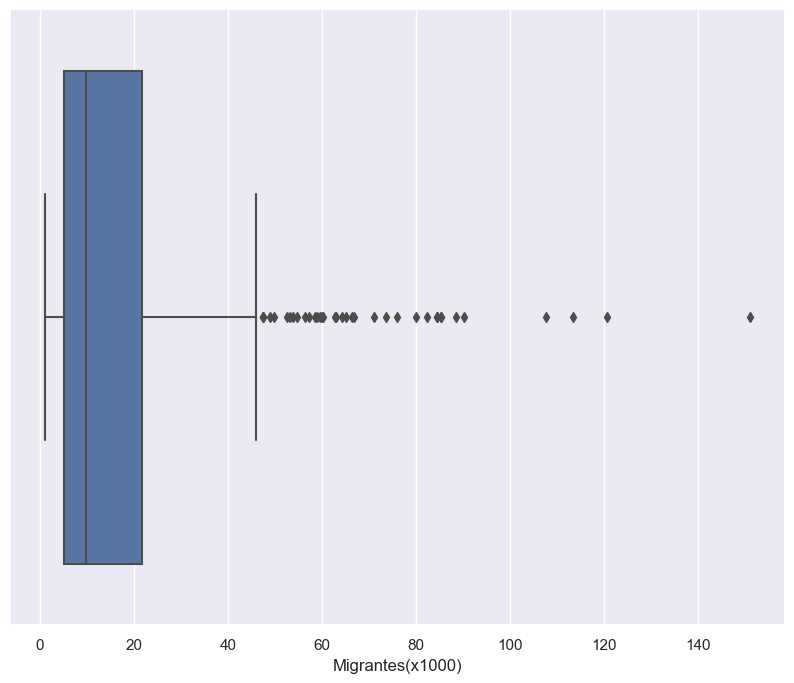

In [97]:
plot_boxplot(emig, 'Migrantes(x1000)')

In [98]:
def remove_outliers(dataframe, col_name):
    Q1 = dataframe[col_name].quantile(0.25)
    Q3 = dataframe[col_name].quantile(0.75)
    IQR = Q3-Q1 
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print('IQR',IQR)
    print('lower_limit',lower_limit)
    print('upper_limit',upper_limit)
    new_data = dataframe[(dataframe['Migrantes(x1000)'] > lower_limit) & (dataframe['Migrantes(x1000)'] < upper_limit)]
    return new_data
 
# 1st degree to remove outliers    
emig1 = remove_outliers(emig, 'Migrantes(x1000)')
# newdata_no_outliers = new_population_dataframe

IQR 16.799999999999997
lower_limit -20.199999999999996
upper_limit 46.99999999999999


In [99]:
emig1= remove_outliers(emig, 'Migrantes(x1000)')

IQR 16.799999999999997
lower_limit -20.199999999999996
upper_limit 46.99999999999999


In [100]:
emig1 = remove_outliers(emig, 'Migrantes(x1000)')

IQR 16.799999999999997
lower_limit -20.199999999999996
upper_limit 46.99999999999999


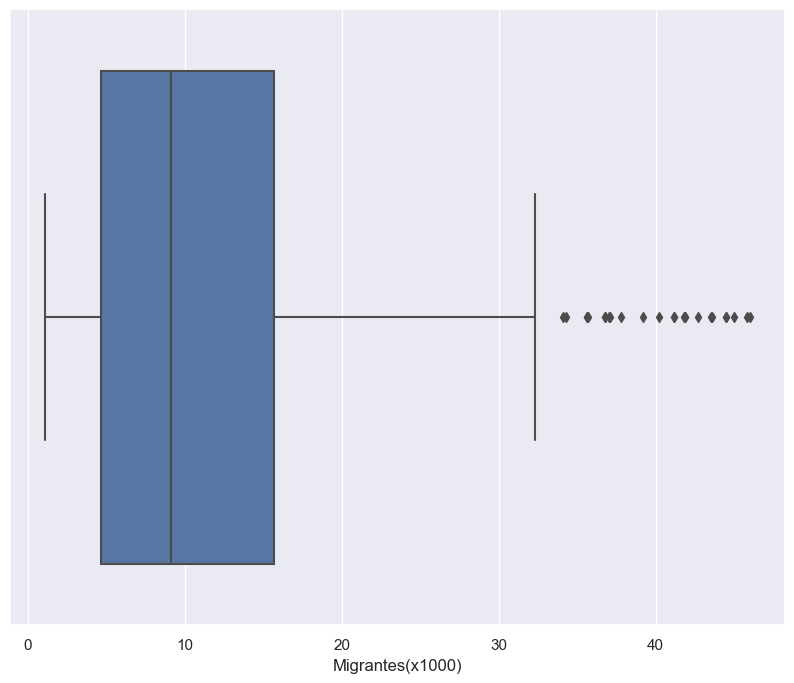

In [101]:
plot_boxplot(emig1, 'Migrantes(x1000)')

#### Heatmap to see the correlation between column

,Year,Migrantes(x1000)
Year,1.000000,0.069471
Migrantes(x1000),0.069471,1.000000


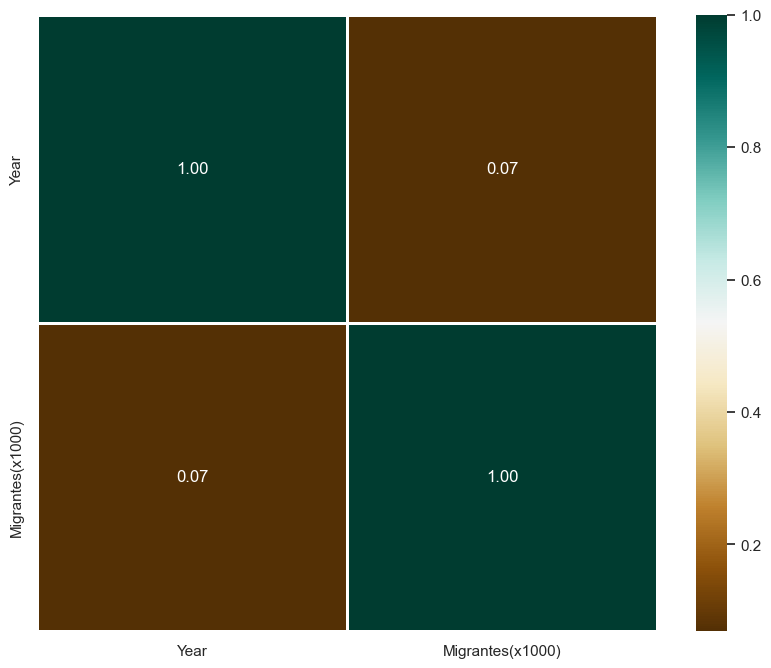

In [102]:
plt.figure(figsize=(10,8))
correlation = emig1.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt='.2f', linewidths=2, cmap="BrBG")
correlation

In [103]:
emig1.shape

(422, 4)

In [104]:
emig1.describe()

,Year,Migrantes(x1000)
count,422.000000,422.000000
mean,2009.457346,12.496682
std,7.745466,10.392951
min,1996.000000,1.100000
25%,2003.000000,4.625000
50%,2010.000000,9.100000
75%,2016.000000,15.700000
max,2022.000000,46.000000


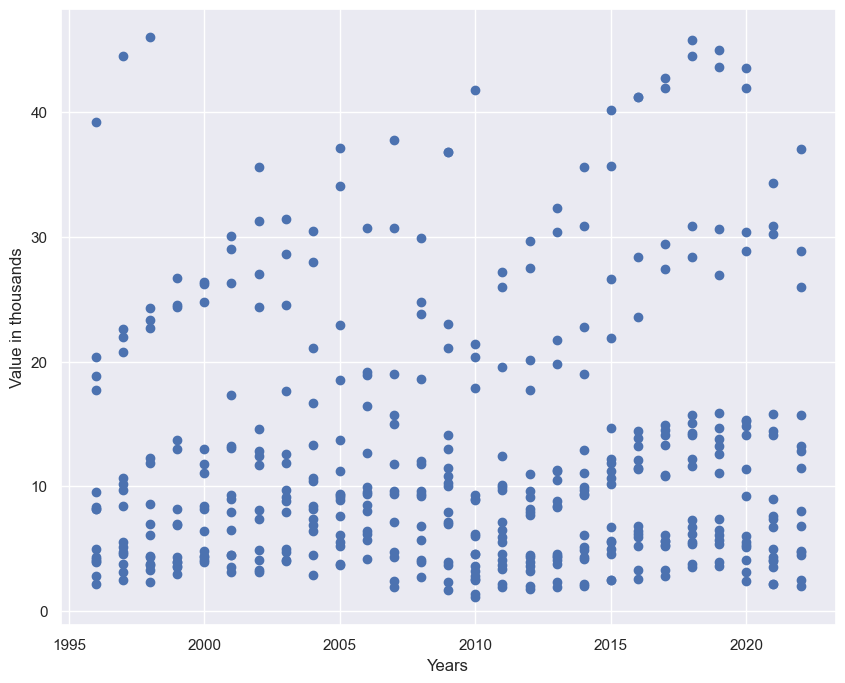

In [105]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(emig1["Year"], emig1["Migrantes(x1000)"])
ax.set_xlabel("Years")
ax.set_ylabel("Value in thousands")
plt.show()

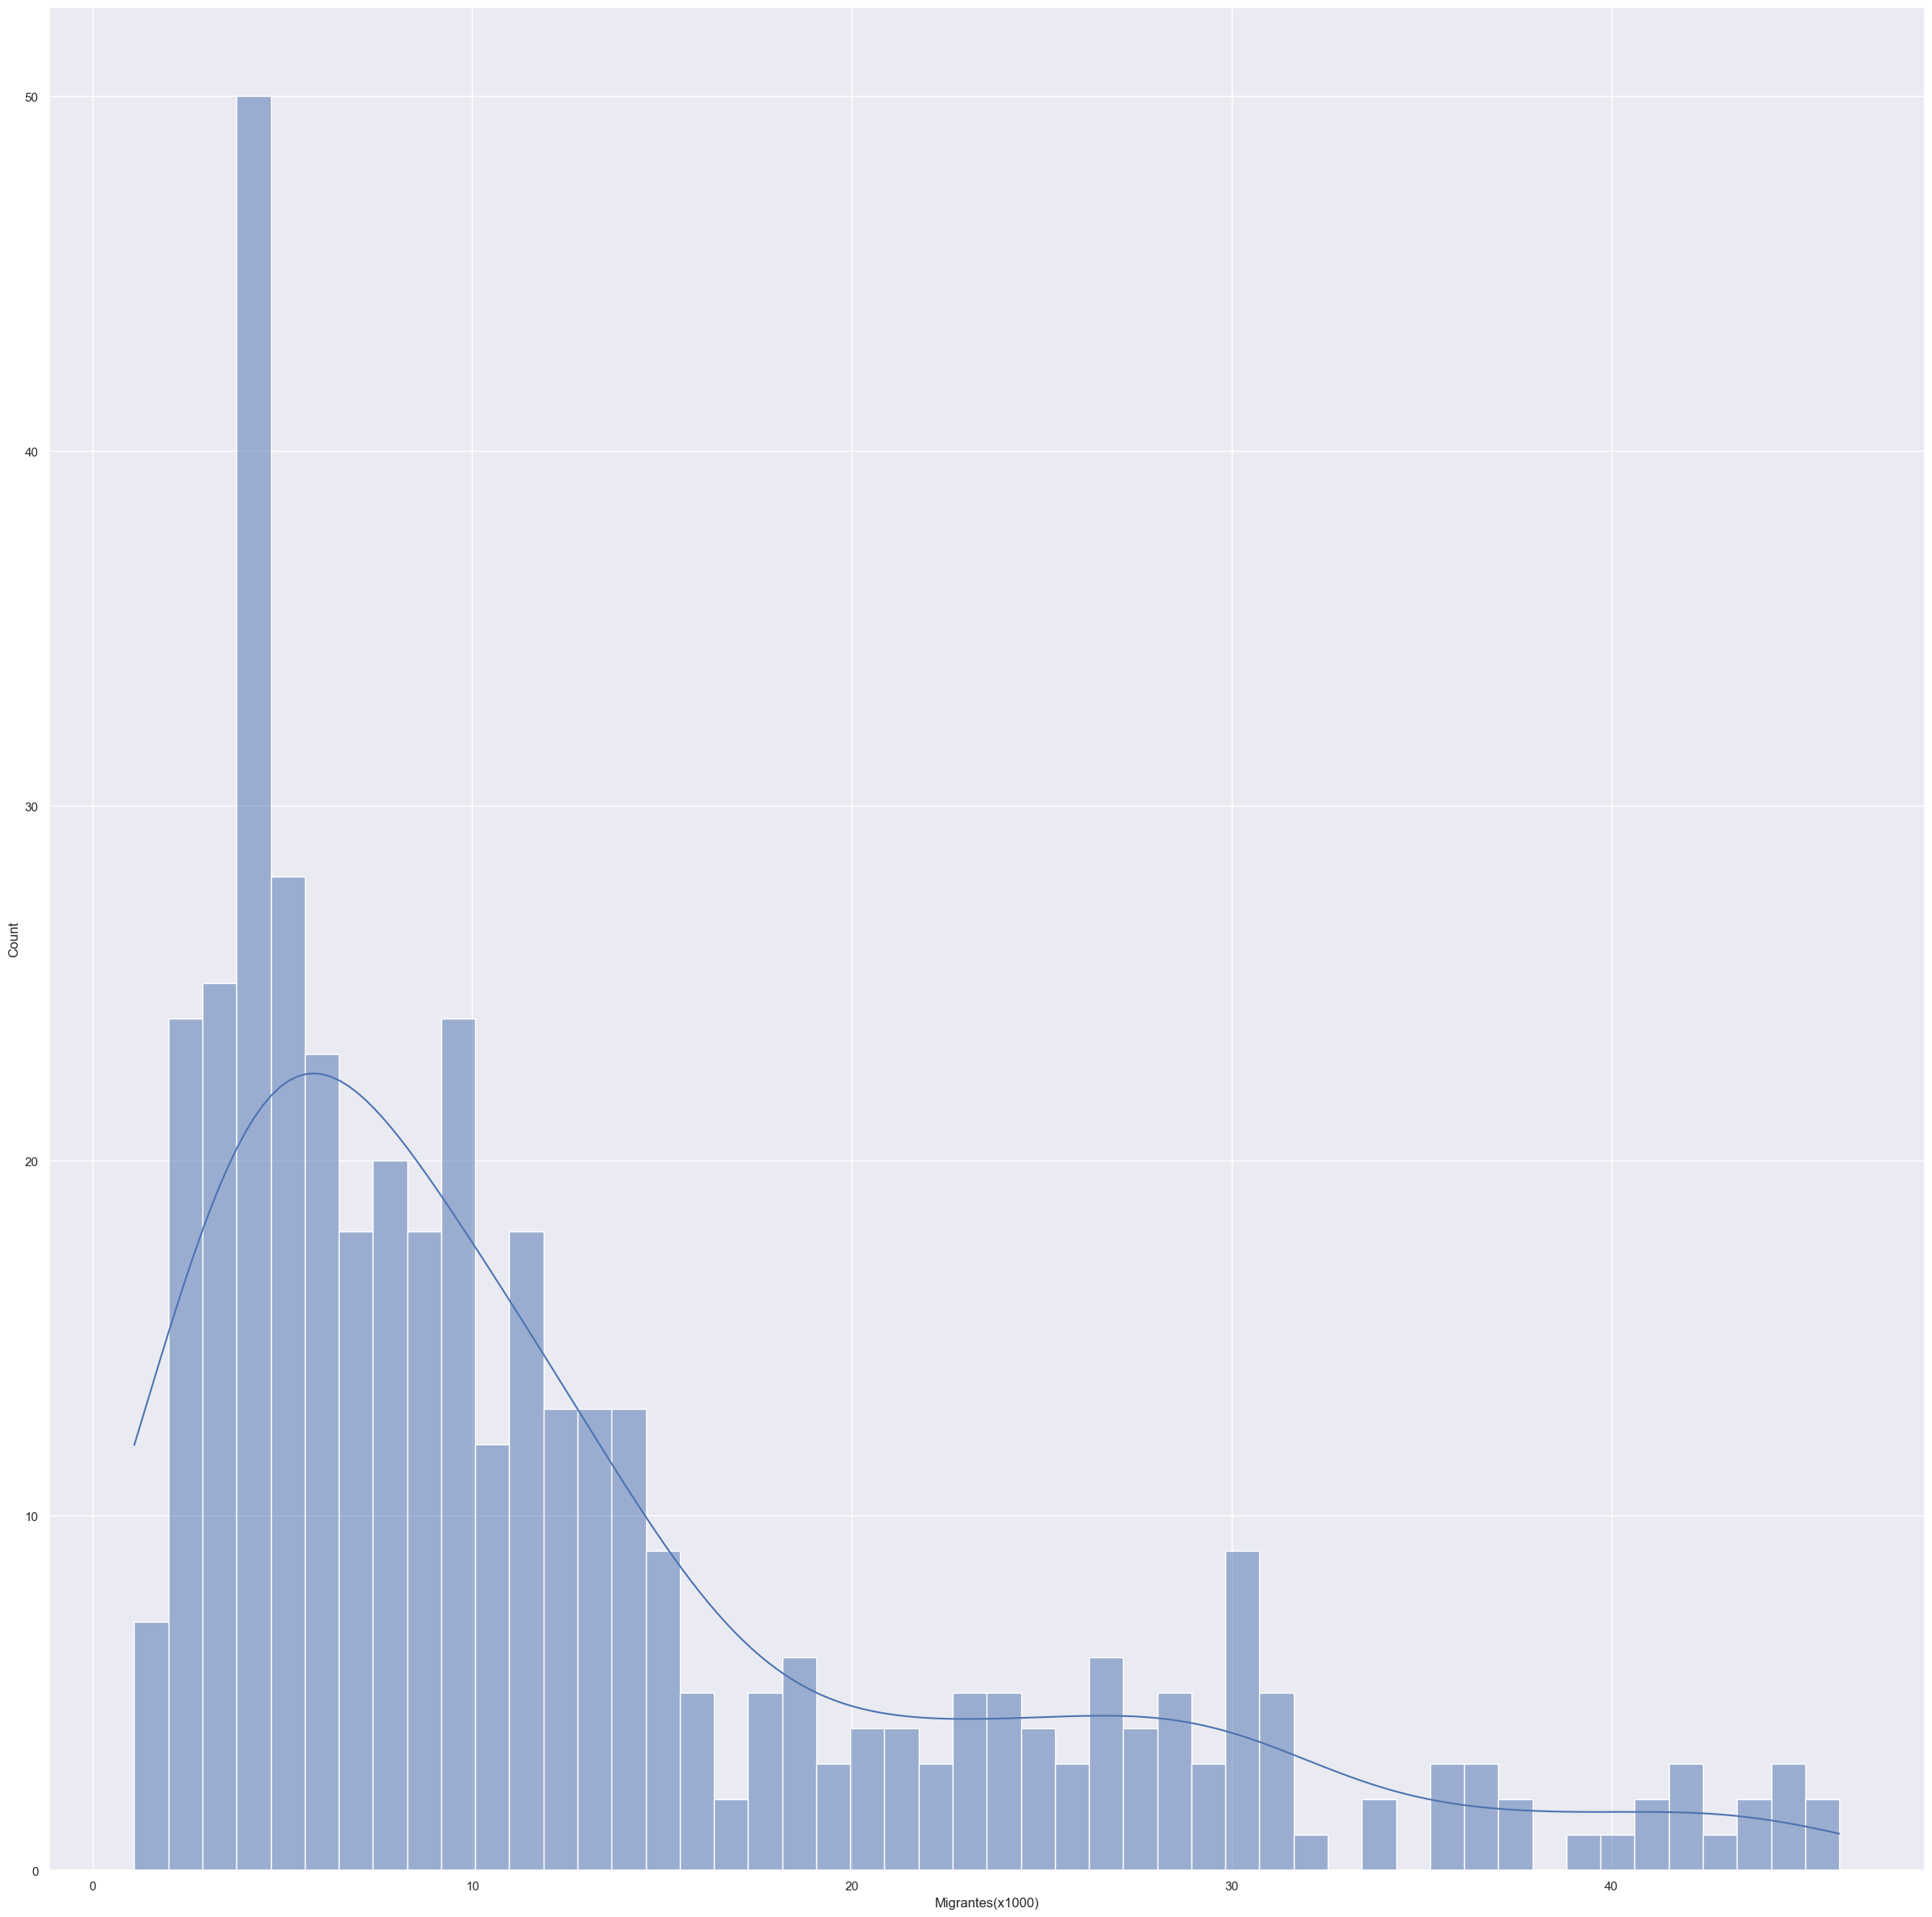

In [106]:
sns.histplot(data=emig1, x='Migrantes(x1000)', kde=True, bins=50);

In [109]:
skew_value = stats.skew(emig1['Migrantes(x1000)'], axis=0, bias=True)
print('Skew Value',skew_value)

Skew Value 1.3741610718026334


In [110]:
kurtosis_value = stats.kurtosis(emig1['Migrantes(x1000)'], axis=0, bias=True)
print('kurtosis Value',kurtosis_value)

kurtosis Value 1.1368320941280876


In [111]:
emig1.describe(include=object)

,Sex,Nationality
count,422,422
unique,3,6
top,Female,Irish
freq,149,81


<Figure size 1000x800 with 0 Axes>

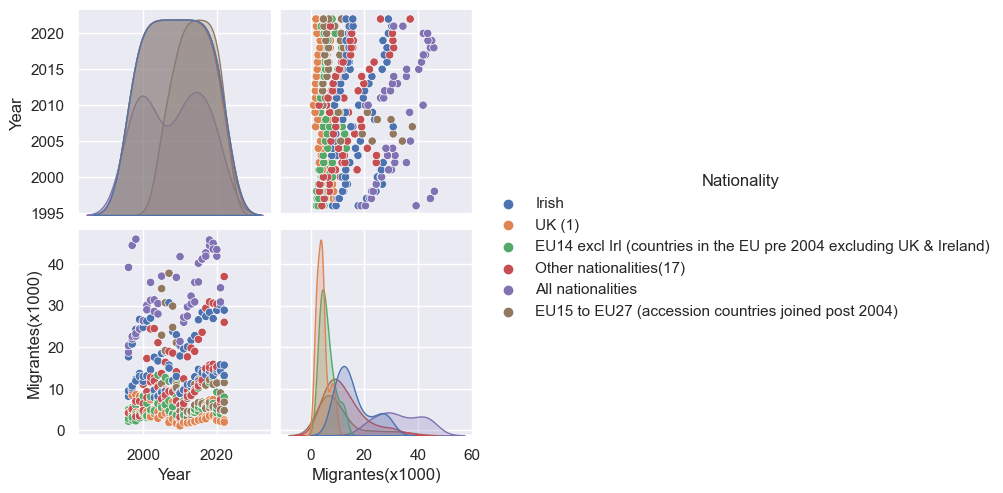

In [112]:
plt.figure(figsize=(10,8));
sns.pairplot(emig1, hue="Nationality");
plt.show()

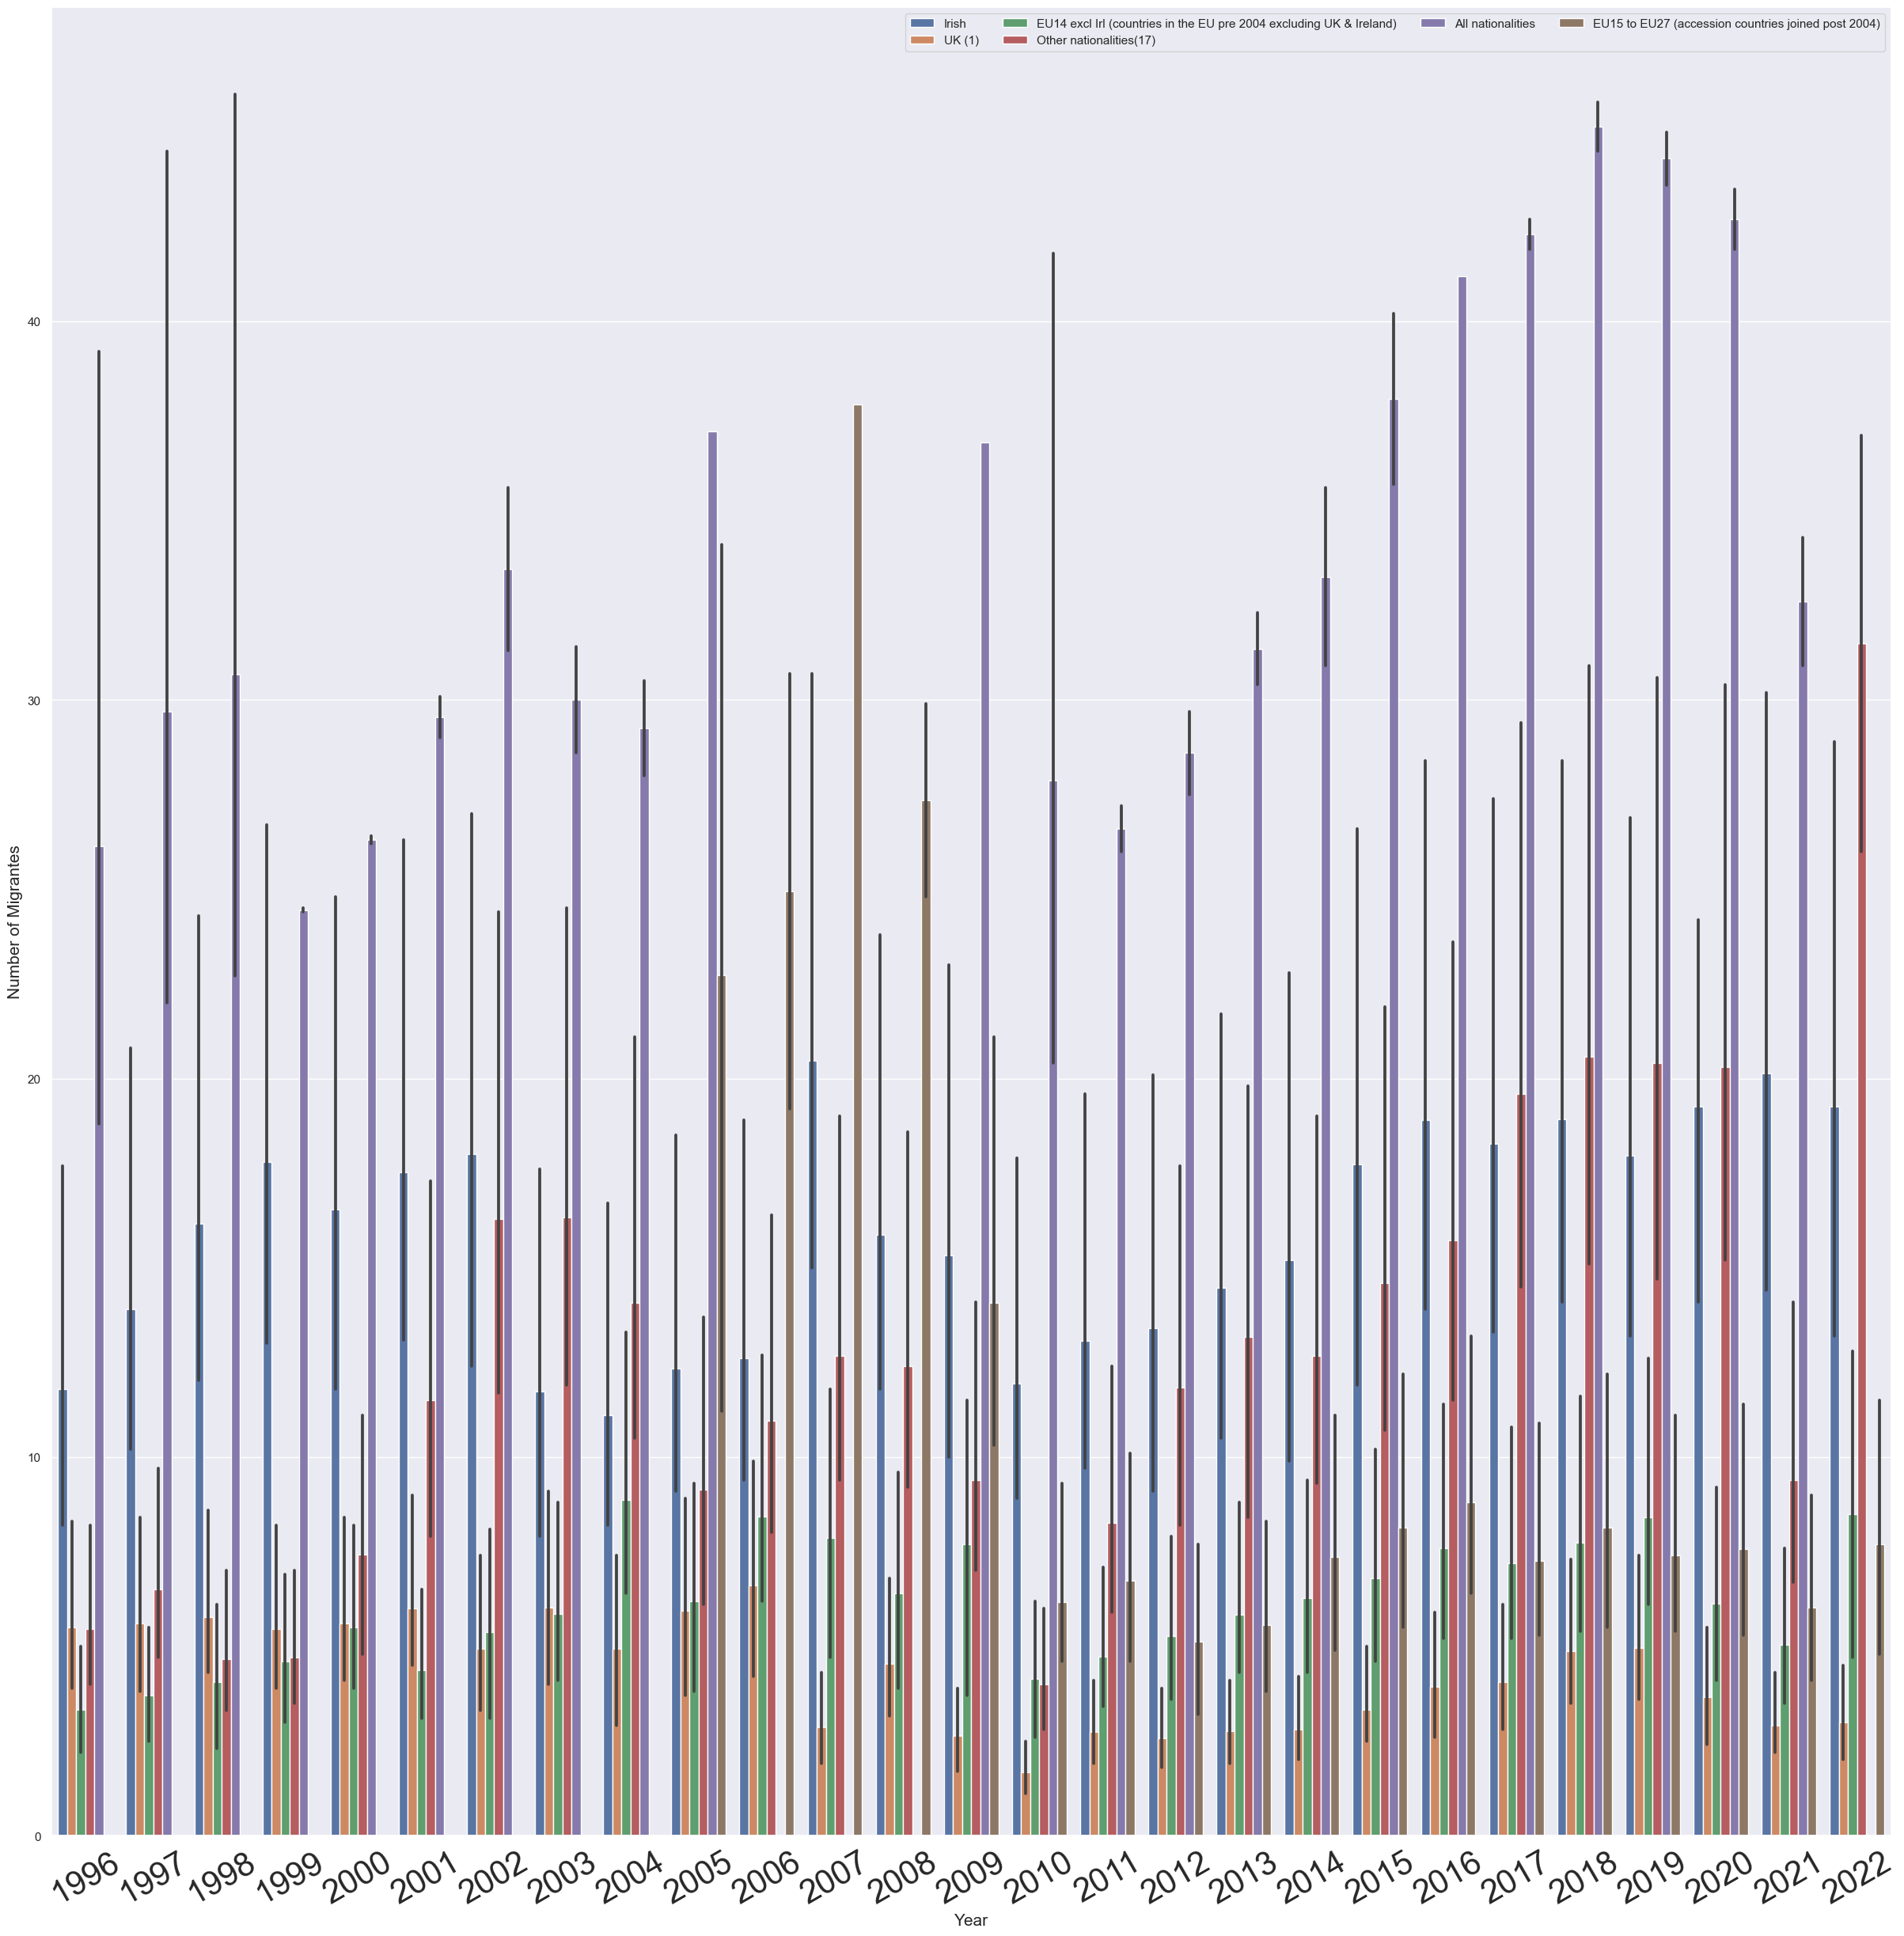

In [113]:
ax = sns.barplot(x='Year', y='Migrantes(x1000)', hue='Nationality', data=emig1) 
ax.legend(loc='upper right', ncol=4)
ax.set_xlabel("Year", fontdict={'fontsize' : 15})
ax.set_ylabel("Number of Migrantes", fontdict={'fontsize' : 15})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=30, rotation=30)

sns.set(rc={'figure.figsize':(30,30)})

In [114]:
# calling the method from preprocessing class and assign into variable
ord_encoder = OrdinalEncoder()             # Ordinal Data
lab_encoder = LabelEncoder()               # Label Data or Nominal Data
cat_encoder = OneHotEncoder(sparse=False)  # Categorical Data | Nominal

# assign data frame to new variable encoded_data_frame
encoded_data_frame = emig1

In [115]:
encoded_data_frame['Sex'] = ord_encoder.fit_transform(encoded_data_frame[['Sex']])
encoded_data_frame['Nationality'] = lab_encoder.fit_transform(encoded_data_frame['Nationality'])
encoded_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 484
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              422 non-null    int64  
 1   Sex               422 non-null    float64
 2   Nationality       422 non-null    int64  
 3   Migrantes(x1000)  422 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 16.5 KB


/var/folders/qd/zln2cqhs3972ntg4tzx06y7w0000gn/T/ipykernel_58539/2775101975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_data_frame['Sex'] = ord_encoder.fit_transform(encoded_data_frame[['Sex']])
/var/folders/qd/zln2cqhs3972ntg4tzx06y7w0000gn/T/ipykernel_58539/2775101975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_data_frame['Nationality'] = lab_encoder.fit_transform(encoded_data_frame['Nationality'])


Normal Distribution

In [116]:
migrants_data = encoded_data_frame['Migrantes(x1000)']

In [117]:
Migrantes_mean_value = migrants_data.mean()
Migrantes_std_value = migrants_data.std()

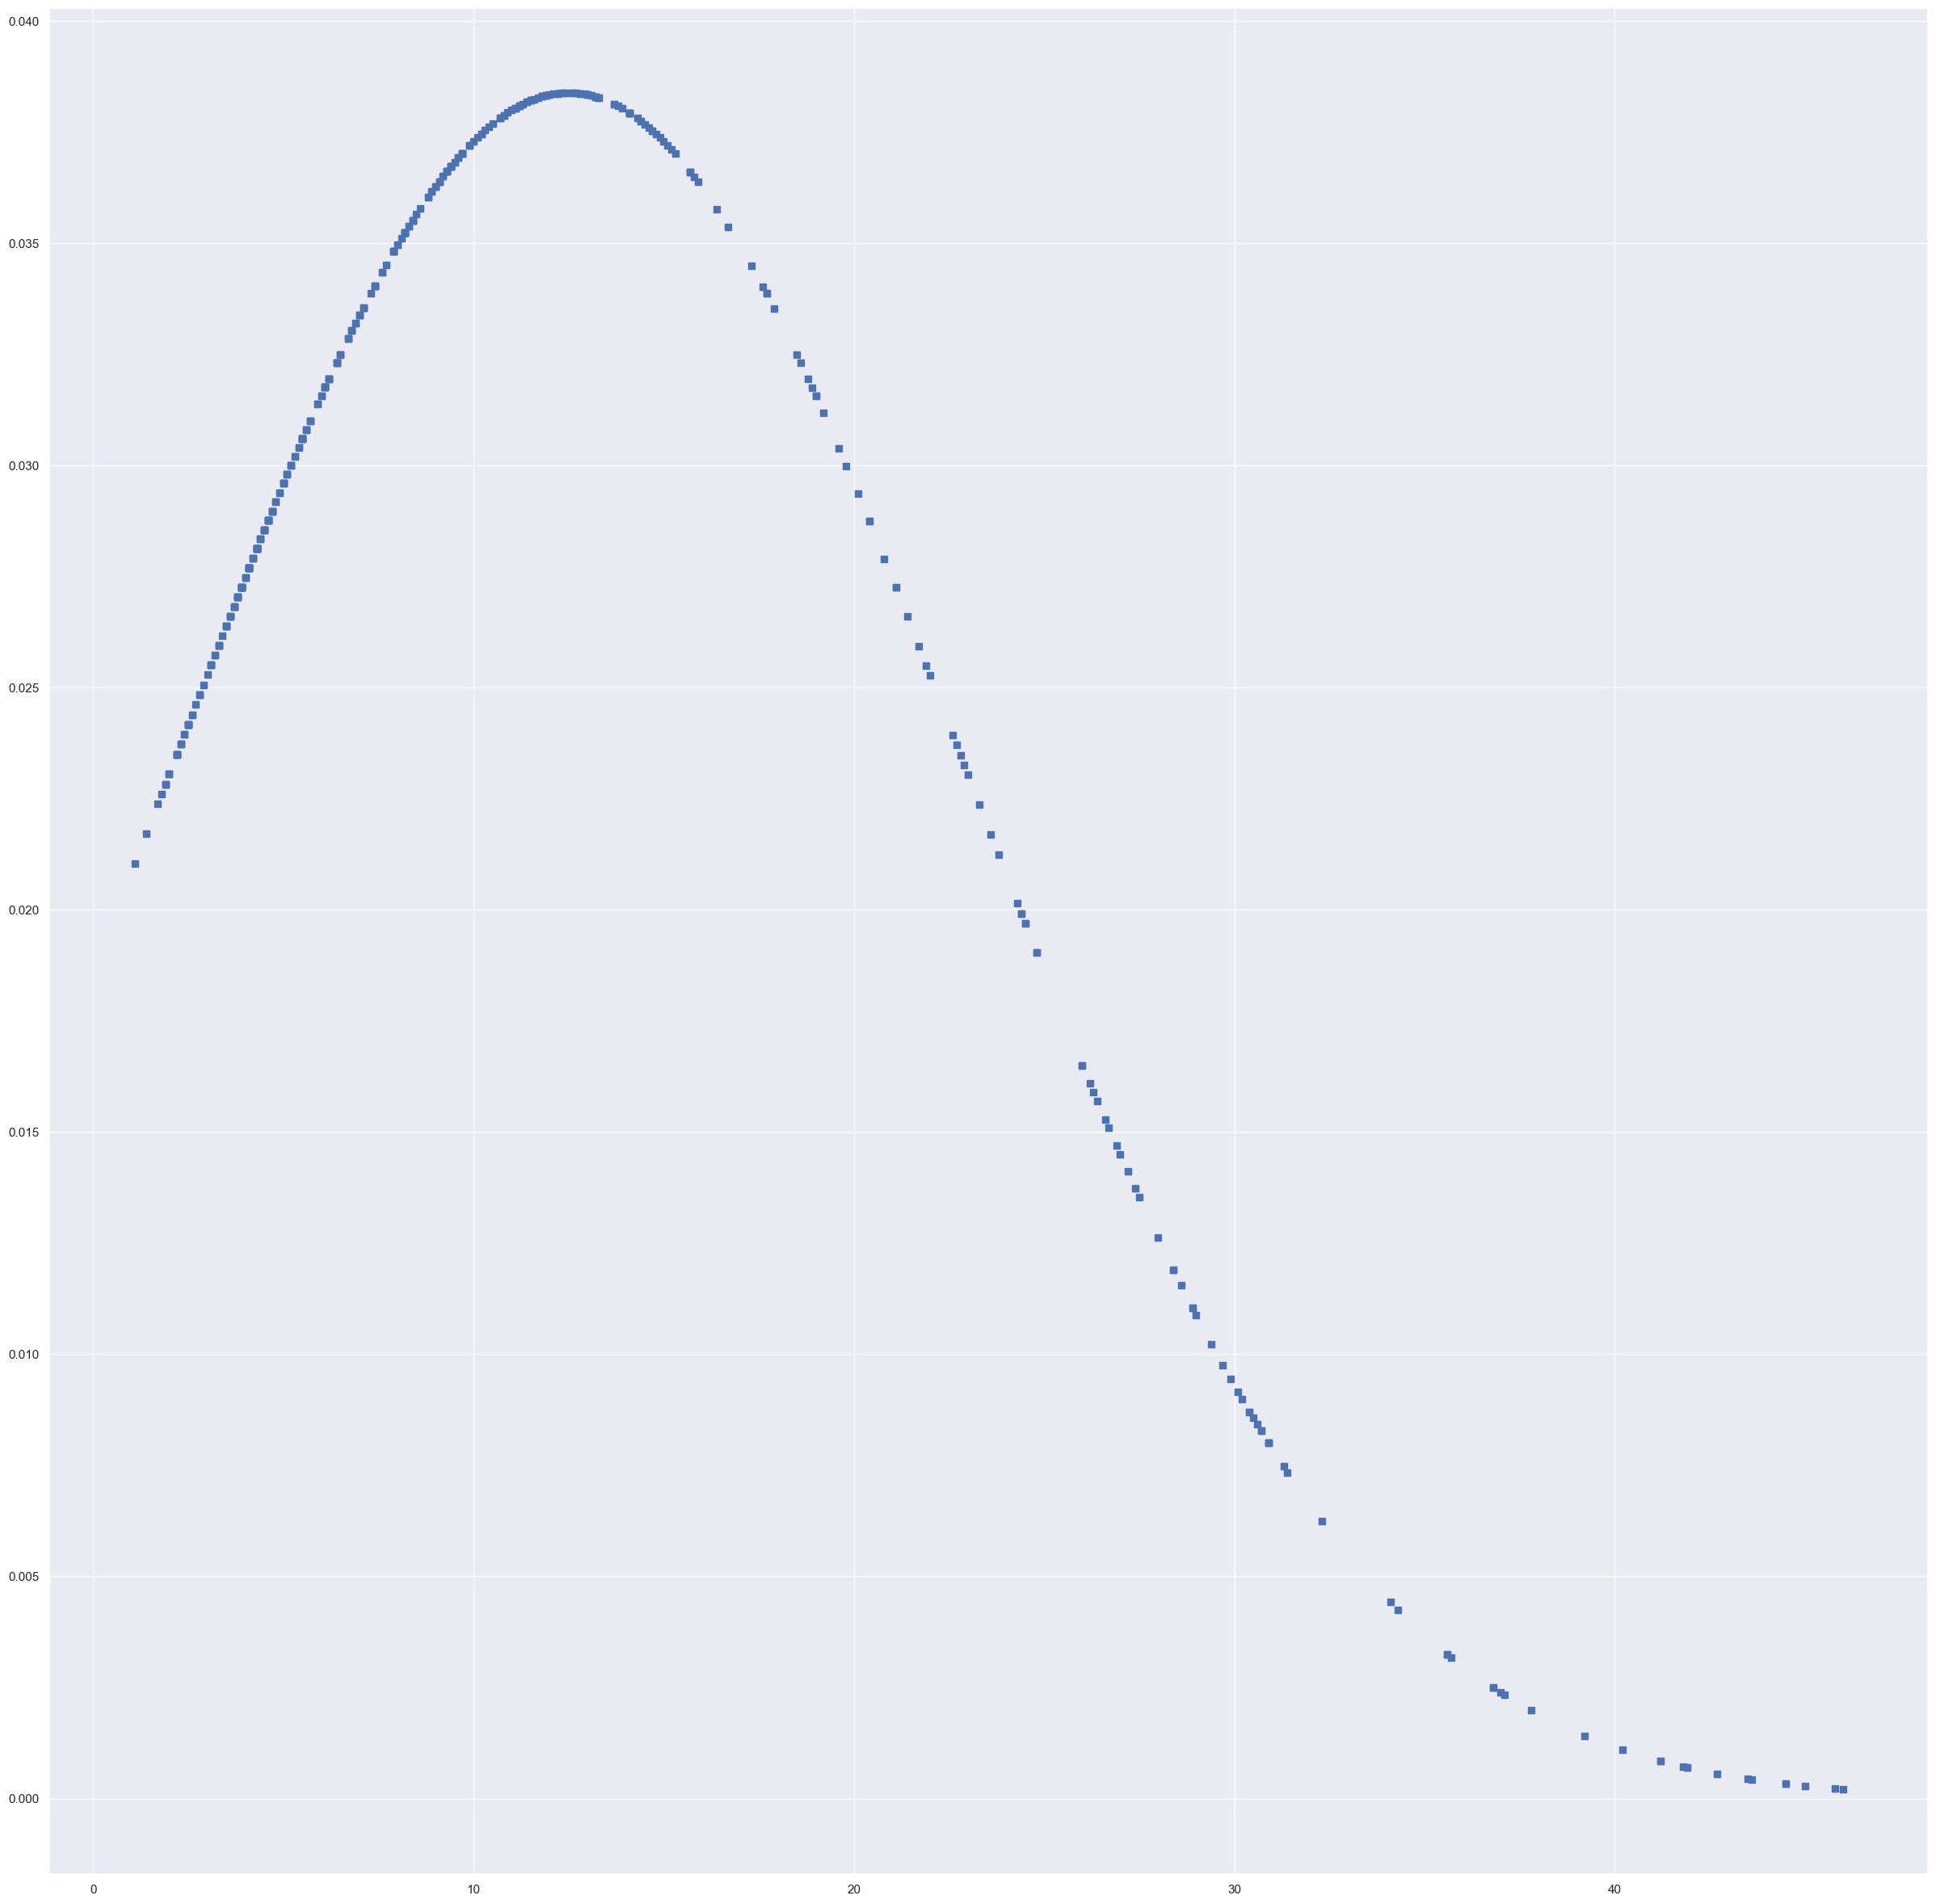

In [118]:
normal_df = stats.norm.pdf(migrants_data, loc=Migrantes_mean_value, scale=Migrantes_std_value)
plt.plot(migrants_data, normal_df, 'bs')

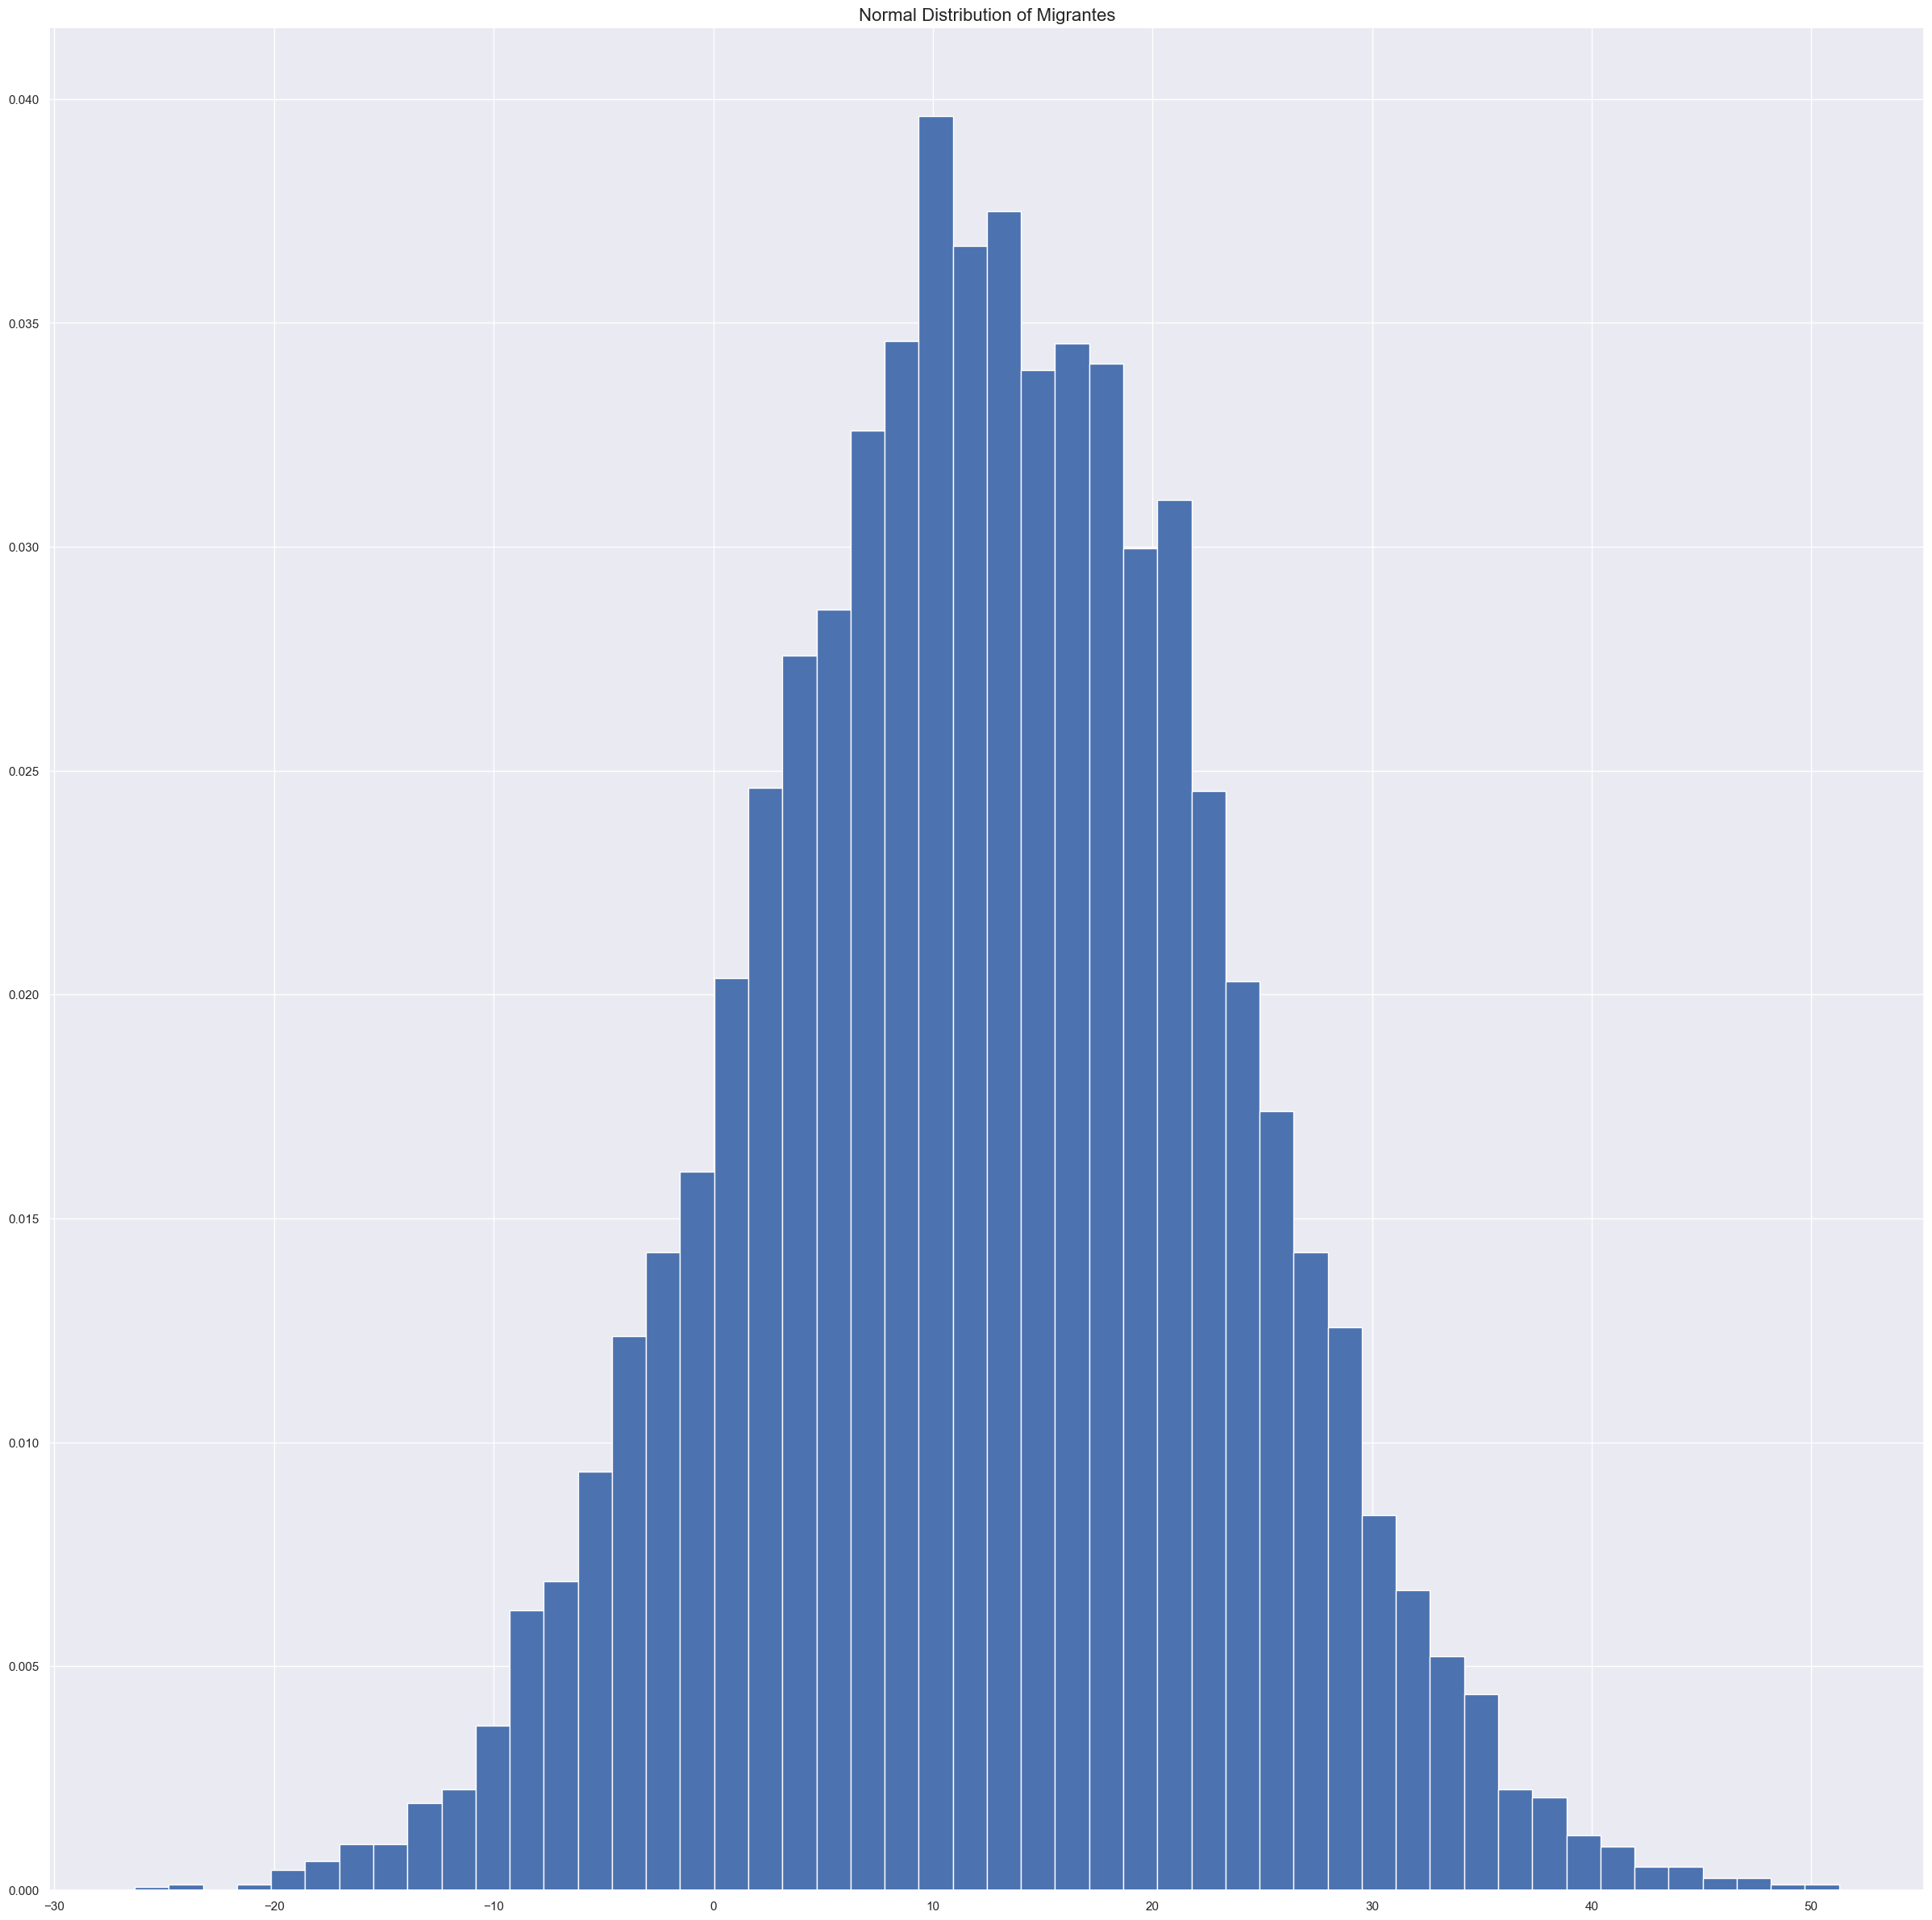

<Figure size 1000x800 with 0 Axes>

In [119]:
n = np.random.normal(Migrantes_mean_value, Migrantes_std_value, size=10000)
count, bins, ignored = plt.hist(n, 50, density=True)
plt.title("Normal Distribution of Migrantes", fontsize=16)
plt.figure(figsize=(10,8))
plt.show()

### Poisson Distributon

In [120]:
migrants_data = encoded_data_frame['Migrantes(x1000)']

In [121]:
poisson_lambda = migrants_data.mean()

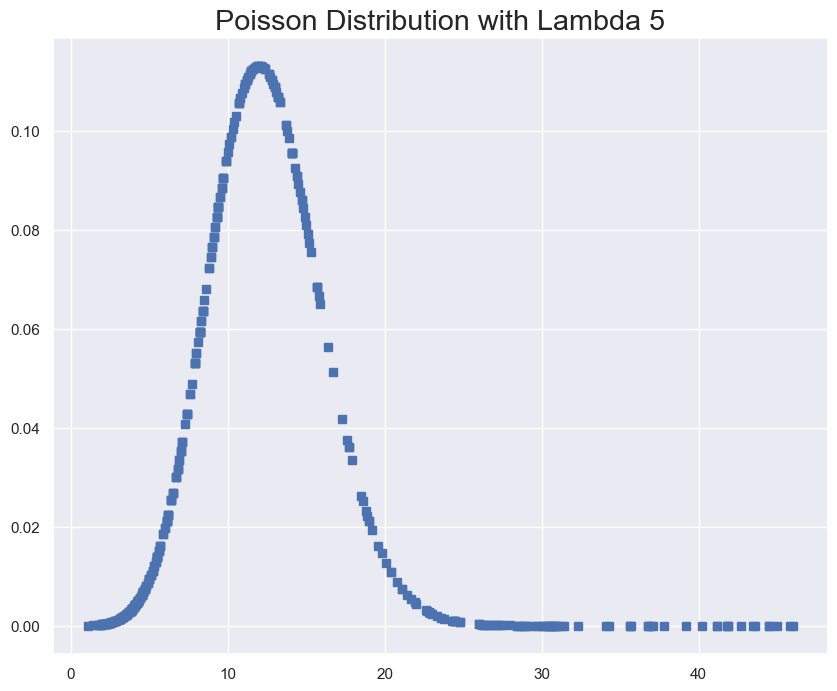

In [122]:

def plot_poisson_distribution(column_value):
    x=pd.Series(column_value).to_numpy()
    y=np.exp(-column_value.mean()) * np.power(column_value.mean(),x)/factorial(x)
    plt.figure(figsize=(10,8))
    plt.title("Poisson Distribution with Lambda 5", fontsize="xx-large")
    plt.plot(x,y,'bs')
    plt.show()

# call function
plot_poisson_distribution(encoded_data_frame['Migrantes(x1000)'])

# Machine Learning Models

In [173]:
encoded_data_frame.head(10)

,Year,Sex,Nationality,Migrantes(x1000)
0,1996,0.0,3,17.7
1,1996,0.0,5,8.3
2,1996,0.0,1,5.0
4,1996,0.0,4,8.2
5,1996,0.0,0,39.2
6,1996,2.0,3,8.2
7,1996,2.0,5,4.3
8,1996,2.0,1,2.2
10,1996,2.0,4,4.0
11,1996,2.0,0,18.8


In [174]:
encoded_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 484
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              422 non-null    int64  
 1   Sex               422 non-null    float64
 2   Nationality       422 non-null    int64  
 3   Migrantes(x1000)  422 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 16.5 KB


In [197]:
encoded_data_frame.shape

(422, 4)

In [175]:
encoded_data_frame.head()

,Year,Sex,Nationality,Migrantes(x1000)
0,1996,0.0,3,17.7
1,1996,0.0,5,8.3
2,1996,0.0,1,5.0
4,1996,0.0,4,8.2
5,1996,0.0,0,39.2


In [176]:
scaler = StandardScaler()

encoded_data_frame_scale = pd.DataFrame(scaler.fit_transform(encoded_data_frame),columns=encoded_data_frame.columns)

In [177]:
encoded_data_frame_scale.head()

,Year,Sex,Nationality,Migrantes(x1000)
0,-1.739511,-1.307673,0.165342,0.501253
1,-1.739511,-1.307673,1.358070,-0.404280
2,-1.739511,-1.307673,-1.027385,-0.722180
3,-1.739511,-1.307673,0.761706,-0.413913
4,-1.739511,-1.307673,-1.623748,2.572418


In [178]:
X = encoded_data_frame[['Year','Sex','Nationality']]
y =encoded_data_frame['Migrantes(x1000)']

In [179]:
def get_best_random_state(X,y):
    best_random_state = None
    
    best_training_accuracy = 0.0
    best_testing_accuracy = 0.0
    
    random_state_range = [*range(1,101)] # list bwtween 1-100
    
    for rndom_state in random_state_range:
        #Split data
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=rndom_state)
    
        #Initializing and training ML model
        Ml_Model = LinearRegression()
        Ml_Model.fit(X_train, y_train)
        
        # train score
        train_score = Ml_Model.score(X_train,y_train)
        
        #test score
        test_score = Ml_Model.score(X_test,y_test)        

        # check if random_state value give best performance
        if (test_score > best_testing_accuracy):
            best_training_accuracy = train_score
            best_testing_accuracy = test_score
            best_random_state = rndom_state

    print(f'Best Training Accuracy: {round(best_training_accuracy*100,3)}%')
    print(f'Best Testing Accuracy: {round(best_testing_accuracy*100,3)}%')
    print(f'Best random state : {best_random_state}')
    return best_random_state
    
best_random_state = get_best_random_state(X,y)   

Best Training Accuracy: 20.192%
Best Testing Accuracy: 36.323%
Best random state : 52


In [180]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=best_random_state)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (337, 3)
X_test: (85, 3)
y_train: (337,)
y_test: (85,)


###Linear Regression

In [181]:
model = LinearRegression()

In [182]:
model.fit(X_train, y_train)

LinearRegression()

In [183]:
y_preds_train = model.predict(X_train)
y_preds_test = model.predict(X_test)

In [184]:
print("R-squared of the model in training set is: {}".format(model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(model.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.20192032946337335
-----Test set statistics-----
R-squared of the model in test set is: 0.3632290381108536
Root mean squared error of the prediction is: 7.539671696990647
Mean absolute percentage error of the prediction is: 66.99610351753813


Random Forest

In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [186]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [187]:
y_pred_random = regressor.predict(X_test)

In [188]:
train_r_squared = regressor.score(X_train, Y_train)
print("R-squared of the model in the training set is: {}".format(train_r_squared))
test_r_squared = regressor.score(X_test, Y_test)
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(test_r_squared))
rmse_value = mean_squared_error(Y_test, y_pred_random) ** 0.5
print("Root mean squared error of the prediction is: {}".format(rmse_value))
mape_value = np.mean(np.abs((Y_test - y_pred_random) / Y_test)) * 100
print("Mean absolute percentage error of the prediction is: {}".format(mape_value))

R-squared of the model in the training set is: 0.9868018396296807
-----Test set statistics-----
R-squared of the model in the test set is: 0.9031854753940487
Root mean squared error of the prediction is: 3.1133317145312183
Mean absolute percentage error of the prediction is: 16.043635998217756


Decision Tree Regressor

In [189]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [190]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [191]:
y_pred_DT = DTregressor.predict(X_test)

In [192]:
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_DT)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_DT) / Y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.8850328071053906
Root mean squared error of the prediction is: 3.3926737677114853
Mean absolute percentage error of the prediction is: 16.024022202104796


Laso Regression

In [193]:
lasso_regression = GridSearchCV(Lasso(), param_grid={'alpha': [0.01,0.1,5,42,100]}, verbose=1)
lasso_regression.fit(X_train, Y_train)
lasso_value = lasso_regression.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [194]:
y_lasso_pridct_train = lasso_value.predict(X_train)
y_lasso_pridct_test = lasso_value.predict(X_test)

In [195]:
print("R-squared of the model in Training set is: {}%\n".format(round(lasso_value.score(X_train,Y_train)*100,3)))
print("*****Statistical Value for Test Model*****\n")
print("R-squared of the model in Test set is: {}%".format(round(lasso_value.score(X_test,Y_test)*100,3)))
print("Root mean squared error of the prediction is: {}%".format(round(rmse(Y_test,y_lasso_pridct_test)*100,3)))
print("Mean absolute percentage error of the prediction is: {}%".format(round(np.mean(np.abs((Y_test - y_lasso_pridct_test)/ Y_test))*100,3)))

R-squared of the model in Training set is: 23.735%

*****Statistical Value for Test Model*****

R-squared of the model in Test set is: 16.489%
Root mean squared error of the prediction is: 914.379%
Mean absolute percentage error of the prediction is: 98.418%
